In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing the Dataset

### Data: https://www.kaggle.com/competitions/instacart-market-basket-analysis/data

In [2]:
! unzip '/content/drive/MyDrive/instacart-market-basket-analysis.zip'  #unzipping the file 

Archive:  /content/drive/MyDrive/instacart-market-basket-analysis.zip
  inflating: aisles.csv.zip          
  inflating: departments.csv.zip     
  inflating: order_products__prior.csv.zip  
  inflating: order_products__train.csv.zip  
  inflating: orders.csv.zip          
  inflating: products.csv.zip        
  inflating: sample_submission.csv.zip  


In [3]:
! unzip '/content/aisles.csv.zip'
! unzip '/content/departments.csv.zip'
! unzip '/content/order_products__prior.csv.zip'
! unzip '/content/order_products__train.csv.zip'
! unzip '/content/orders.csv.zip'
! unzip '/content/products.csv.zip'

Archive:  /content/aisles.csv.zip
  inflating: aisles.csv              
   creating: __MACOSX/
  inflating: __MACOSX/._aisles.csv   
Archive:  /content/departments.csv.zip
  inflating: departments.csv         
  inflating: __MACOSX/._departments.csv  
Archive:  /content/order_products__prior.csv.zip
  inflating: order_products__prior.csv  
  inflating: __MACOSX/._order_products__prior.csv  
Archive:  /content/order_products__train.csv.zip
  inflating: order_products__train.csv  
  inflating: __MACOSX/._order_products__train.csv  
Archive:  /content/orders.csv.zip
  inflating: orders.csv              
  inflating: __MACOSX/._orders.csv   
Archive:  /content/products.csv.zip
  inflating: products.csv            
  inflating: __MACOSX/._products.csv  


## Importing Libraries

In [75]:
import numpy as np
import pandas as pd

from datetime import datetime
from wordcloud import WordCloud

import matplotlib
matplotlib.rcParams['figure.dpi'] = 120 #resolution
matplotlib.rcParams['figure.figsize'] = (8,6) #figure size

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
color = sns.color_palette()

## Reading the Dataset

In [5]:
aisles_df = pd.read_csv("/content/aisles.csv")
departments_df = pd.read_csv("/content/departments.csv")
order_products_train_df = pd.read_csv("/content/order_products__train.csv")
order_products_prior_df = pd.read_csv("/content/order_products__prior.csv")
orders_df = pd.read_csv("/content/orders.csv")
products_df = pd.read_csv("/content/products.csv")

## How does the data look like ?

Attributes Of Each CSV files are given below

**1. Aisles.csv**

a. Aisle Id: A unique Id to represent each aisle (Integer: int16)

b. Aisle: Contains the name of aisle based on products on the aisle (String)

**2. Departments.csv**

a. Department Id : Unique integer to represent each department (Integer : int16)

b. Department : String which tells the name of department depending upon products in department (String)

**3. Order Products Prior.csv**

a. Order Id : Unique integer to represent order (Integer : int32)

b. Product Id : Unique integer for each product (Integer : int32)

c. Add to cart order : Order in which product is added in the cart (Integer : int16)

d. Reordered : Binary variable (0 = Not reordered /1 = Reordered)

**4. Order Products Train.csv**

a. Order Id : Unique integer to represent order (Integer : int)

b. Product Id : Unique integer for each product (Integer : int32)

c. Add to cart order : Order in which product is added in the cart (Integer : int16)

d. Reordered : Binary variable (0 = Not reordered /1 = Reordered)

**5. Order.csv**

a. Order Id : Unique integer to represent order (Integer : int64)

b. User Id : Unique integer to represent different users (Integer : int64)

c. Eval Set : Tells whether order is from Prior or Train (String)

d. Order Number : Order number for the order made by customer (Integer : int64)

e. Order Dow : Ranges from 0-6  (Integer : int16)

f. Order Hour Of Day : Ranges from 0-23 where 0 = 12 a.m and 23 = 11 p.m (Integer : int16)

g. Day Since Prior Order : Number of days since last order is placed (Integer : int16)

**6. Products.csv**

a. Product Id : Unique Id for each product since there are huge number of products so will have large range (Integer : int64)

b. Product Name : Name of the product (String)

c. Aisle Id : Id of the aisle where the product is present (Integer : int64)

d. Department Id : Unique Id for each department (Integer : int32)

**7. Sample Submission.csv**

a. Order Id : Id for each order placed (Integer : int64)

b. Products : List of space delimited product id which all products will be ordered (Integer : int64)

Note: The most recent orders are placed in Order Products Prior whereas users previous records are stored in Order Products Train.

# Data Description

## 1. Aisles

In [6]:
aisles_df.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [7]:
aisles_df.tail()

,aisle_id,aisle
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief
133,134,specialty wines champagnes


In [8]:
aisles_df.shape

(134, 2)

In [9]:
aisles_df.describe(include='all')

,aisle_id,aisle
count,134.000000,134
unique,NaN,134
top,NaN,prepared soups salads
freq,NaN,1
mean,67.500000,NaN
std,38.826537,NaN
min,1.000000,NaN
25%,34.250000,NaN
50%,67.500000,NaN
75%,100.750000,NaN


In [10]:
aisles_df.aisle.unique()

array(['prepared soups salads', 'specialty cheeses',
       'energy granola bars', 'instant foods',
       'marinades meat preparation', 'other', 'packaged meat',
       'bakery desserts', 'pasta sauce', 'kitchen supplies',
       'cold flu allergy', 'fresh pasta', 'prepared meals',
       'tofu meat alternatives', 'packaged seafood', 'fresh herbs',
       'baking ingredients', 'bulk dried fruits vegetables',
       'oils vinegars', 'oral hygiene', 'packaged cheese', 'hair care',
       'popcorn jerky', 'fresh fruits', 'soap', 'coffee', 'beers coolers',
       'red wines', 'honeys syrups nectars', 'latino foods',
       'refrigerated', 'packaged produce', 'kosher foods',
       'frozen meat seafood', 'poultry counter', 'butter',
       'ice cream ice', 'frozen meals', 'seafood counter',
       'dog food care', 'cat food care', 'frozen vegan vegetarian',
       'buns rolls', 'eye ear care', 'candy chocolate', 'mint gum',
       'vitamins supplements', 'breakfast bars pastries',
       '

Observation:
This file contains different aisles and there are total 134 unique aisles.

## **2. Departments**

In [11]:
departments_df.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [12]:
departments_df.tail()

,department_id,department
16,17,household
17,18,babies
18,19,snacks
19,20,deli
20,21,missing


In [13]:
departments_df.describe(include='all')

,department_id,department
count,21.000000,21
unique,NaN,21
top,NaN,frozen
freq,NaN,1
mean,11.000000,NaN
std,6.204837,NaN
min,1.000000,NaN
25%,6.000000,NaN
50%,11.000000,NaN
75%,16.000000,NaN


In [14]:
departments_df.department.unique()

array(['frozen', 'other', 'bakery', 'produce', 'alcohol', 'international',
       'beverages', 'pets', 'dry goods pasta', 'bulk', 'personal care',
       'meat seafood', 'pantry', 'breakfast', 'canned goods',
       'dairy eggs', 'household', 'babies', 'snacks', 'deli', 'missing'],
      dtype=object)

This file contains different departments and there are total 21 unique department in the mart.

## **3. Order Product Prior**

In [15]:
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [16]:
order_products_prior_df.tail()

,order_id,product_id,add_to_cart_order,reordered
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1
32434488,3421083,5020,10,1


In [17]:
order_products_prior_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB


In [18]:
order_products_prior_df.shape

(32434489, 4)

In [19]:
order_products_prior_df.describe(include='all')

,order_id,product_id,add_to_cart_order,reordered
count,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07
mean,1.710749e+06,2.557634e+04,8.351076e+00,5.896975e-01
std,9.873007e+05,1.409669e+04,7.126671e+00,4.918886e-01
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.559430e+05,1.353000e+04,3.000000e+00,0.000000e+00
50%,1.711048e+06,2.525600e+04,6.000000e+00,1.000000e+00
75%,2.565514e+06,3.793500e+04,1.100000e+01,1.000000e+00
max,3.421083e+06,4.968800e+04,1.450000e+02,1.000000e+00


## 4. Order Product Train

In [20]:
order_products_train_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [21]:
order_products_train_df.tail()

,order_id,product_id,add_to_cart_order,reordered
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1
1384616,3421070,4724,3,1


In [22]:
order_products_train_df.shape

(1384617, 4)

In [23]:
# % of reordered products 
print("% of reordered products from prior set ",order_products_prior_df.reordered.sum()/order_products_prior_df.shape[0])
print("% of reordered products from train set ",order_products_train_df.reordered.sum()/order_products_train_df.shape[0])

% of reordered products from prior set  0.5896974667922161
% of reordered products from train set  0.5985944127509629


In [24]:
# % of orders with no reordered items
df=order_products_prior_df.groupby(['order_id'], as_index=False)['reordered'].sum()
print("% of orders with no items reordered in prior set = ",df[df['reordered']==0].shape[0]/df.shape[0] * 100)

df=order_products_train_df.groupby(['order_id'], as_index=False)['reordered'].sum()
print("% of orders with no items reordered in train set = ",df[df['reordered']==0].shape[0]/df.shape[0] * 100)

% of orders with no items reordered in prior set =  12.084859313304348
% of orders with no items reordered in train set =  6.555952716658156


## **5. Orders**

In [25]:
orders_df.head(15)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [26]:
orders_df.tail()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0
3421082,272231,206209,train,14,6,14,30.0


In [27]:
orders_df.shape

(3421083, 7)

In [28]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [29]:
orders_df.describe(include='all')

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3.421083e+06,3.421083e+06,3421083,3.421083e+06,3.421083e+06,3.421083e+06,3.214874e+06
unique,NaN,NaN,3,NaN,NaN,NaN,NaN
top,NaN,NaN,prior,NaN,NaN,NaN,NaN
freq,NaN,NaN,3214874,NaN,NaN,NaN,NaN
mean,1.710542e+06,1.029782e+05,NaN,1.715486e+01,2.776219e+00,1.345202e+01,1.111484e+01
std,9.875817e+05,5.953372e+04,NaN,1.773316e+01,2.046829e+00,4.226088e+00,9.206737e+00
min,1.000000e+00,1.000000e+00,NaN,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.552715e+05,5.139400e+04,NaN,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00
50%,1.710542e+06,1.026890e+05,NaN,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00
75%,2.565812e+06,1.543850e+05,NaN,2.300000e+01,5.000000e+00,1.600000e+01,1.500000e+01


In [30]:
len(orders_df.order_id.unique())

3421083

In [31]:
len(orders_df.user_id.unique())

206209

In [32]:
orders_df.eval_set.value_counts()

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

#### We can see that in orders file there are

   3214874 orders in prior

   131209 orders in train
   
   75000 orders in test

   

In [33]:
orders_df[['user_id','eval_set']].groupby(['eval_set']).nunique()

,user_id
eval_set,
prior,206209
test,75000
train,131209


Out of 206209 customers, 75000 are present in the test set while 131209 are present in the train set.

In [34]:
orders_df[orders_df.eval_set=='train'].nunique()

order_id                  131209
user_id                   131209
eval_set                       1
order_number                  97
order_dow                      7
order_hour_of_day             24
days_since_prior_order        31
dtype: int64

In [35]:
orders_df[orders_df.eval_set=='prior'].nunique()

order_id                  3214874
user_id                    206209
eval_set                        1
order_number                   99
order_dow                       7
order_hour_of_day              24
days_since_prior_order         31
dtype: int64

In [36]:
orders_df[orders_df.eval_set=='test'].nunique()

order_id                  75000
user_id                   75000
eval_set                      1
order_number                 97
order_dow                     7
order_hour_of_day            24
days_since_prior_order       31
dtype: int64

Text(0.5, 1.0, 'Frequency of order by Day of Week')

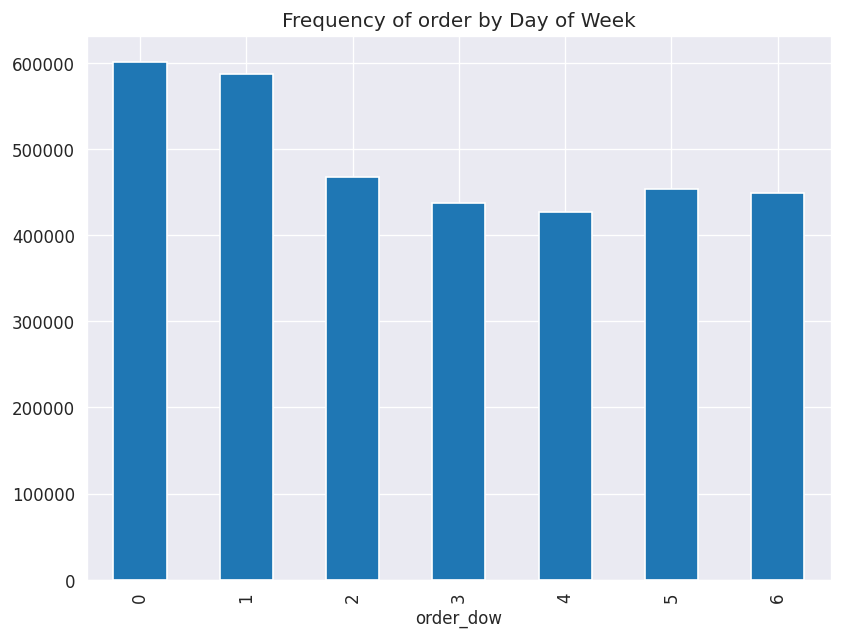

In [37]:
# Orders by DOW
orders_df.groupby('order_dow')['order_dow'].count().plot(kind='bar')
plt.title("Frequency of order by Day of Week")

From the graph it can be concluded that as the order frequency is at peak on DOW : 0 & 1 and assuming orders are generally ordered more on weekend DOW : 0 & 1 denotes saturday and sunday respectively.

Text(0.5, 1.0, 'Total Unique Users per Day of Week')

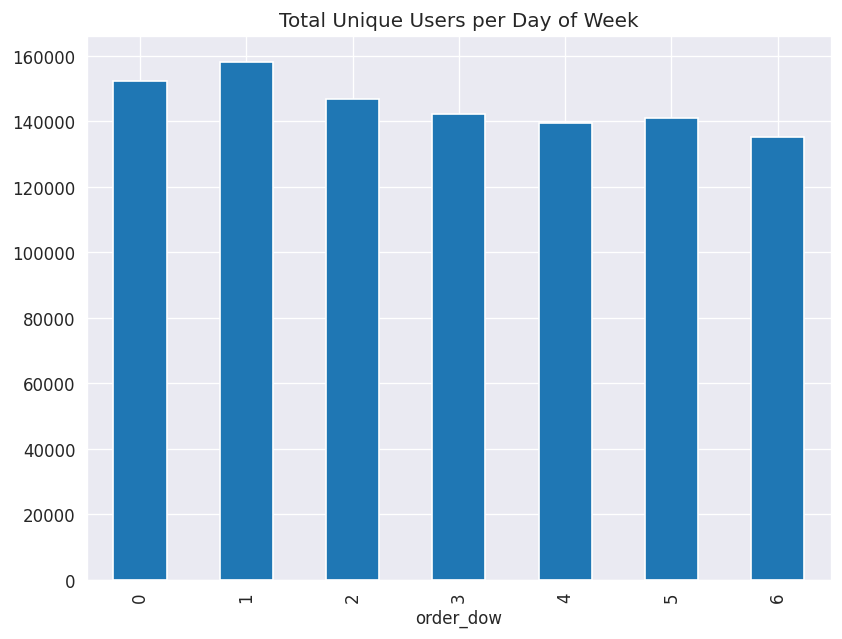

In [38]:
# Total unique users per DOW
orders_df.groupby('order_dow')['user_id'].nunique().plot(kind='bar')
plt.title("Total Unique Users per Day of Week")

Total unique users are more on weekands than that of weekdays


Text(0.5, 1.0, 'Frequency of order by hour of Day')

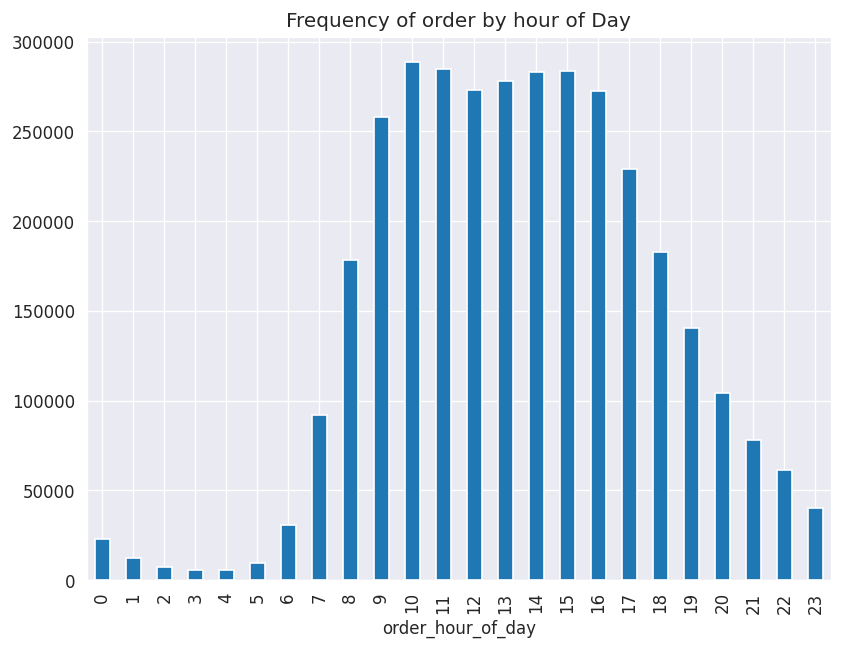

In [39]:
# Orders by HOD
orders_df.groupby('order_hour_of_day')['order_hour_of_day'].count().plot(kind='bar')
plt.title("Frequency of order by hour of Day")

It can be concluded that majority of orders are placed during the day time.

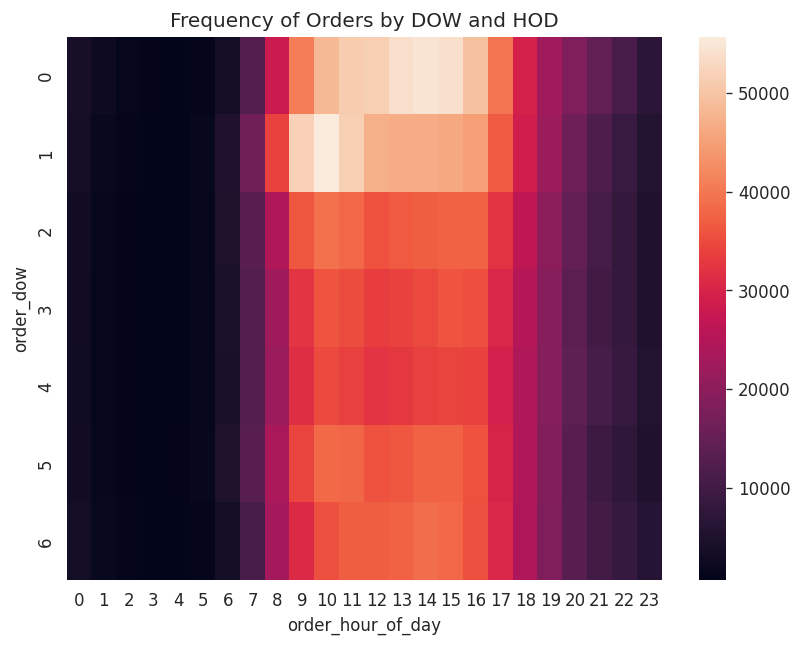

In [40]:
#Correlation between hour of day and day of week
grouped_df = orders_df[["order_number","order_dow", "order_hour_of_day"]].groupby(["order_dow", "order_hour_of_day"]).count().reset_index()
grouped_df = grouped_df.pivot(index = 'order_dow', columns = 'order_hour_of_day', values = 'order_number')

sns.heatmap(grouped_df)
plt.title("Frequency of Orders by DOW and HOD")
plt.show()

From the plot it can be concluded that the order on Saturday (DOW: 0) is at peak in afternoon and on sunday (DOW:1) is at peak in morning

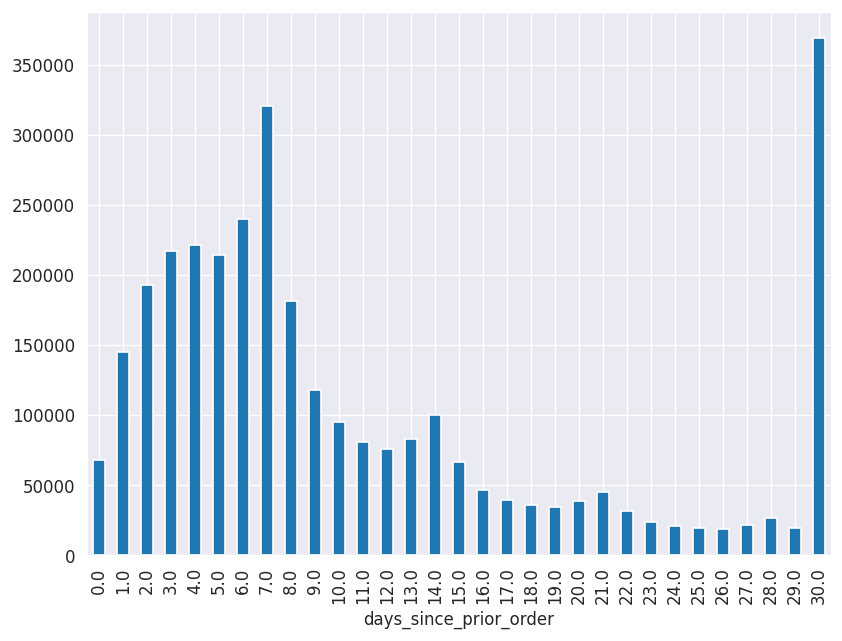

In [41]:
#Days since prior order distribution
orders_df.groupby('days_since_prior_order')['order_id'].count().plot(kind='bar')

Most of the orders are placed again  within 7 days otherwise on monthly basis.

In [42]:
max_order_number = orders_df.groupby('user_id')['order_number'].max().value_counts()

Text(0.5, 1.0, 'Frequency of Total Orders by Customers')

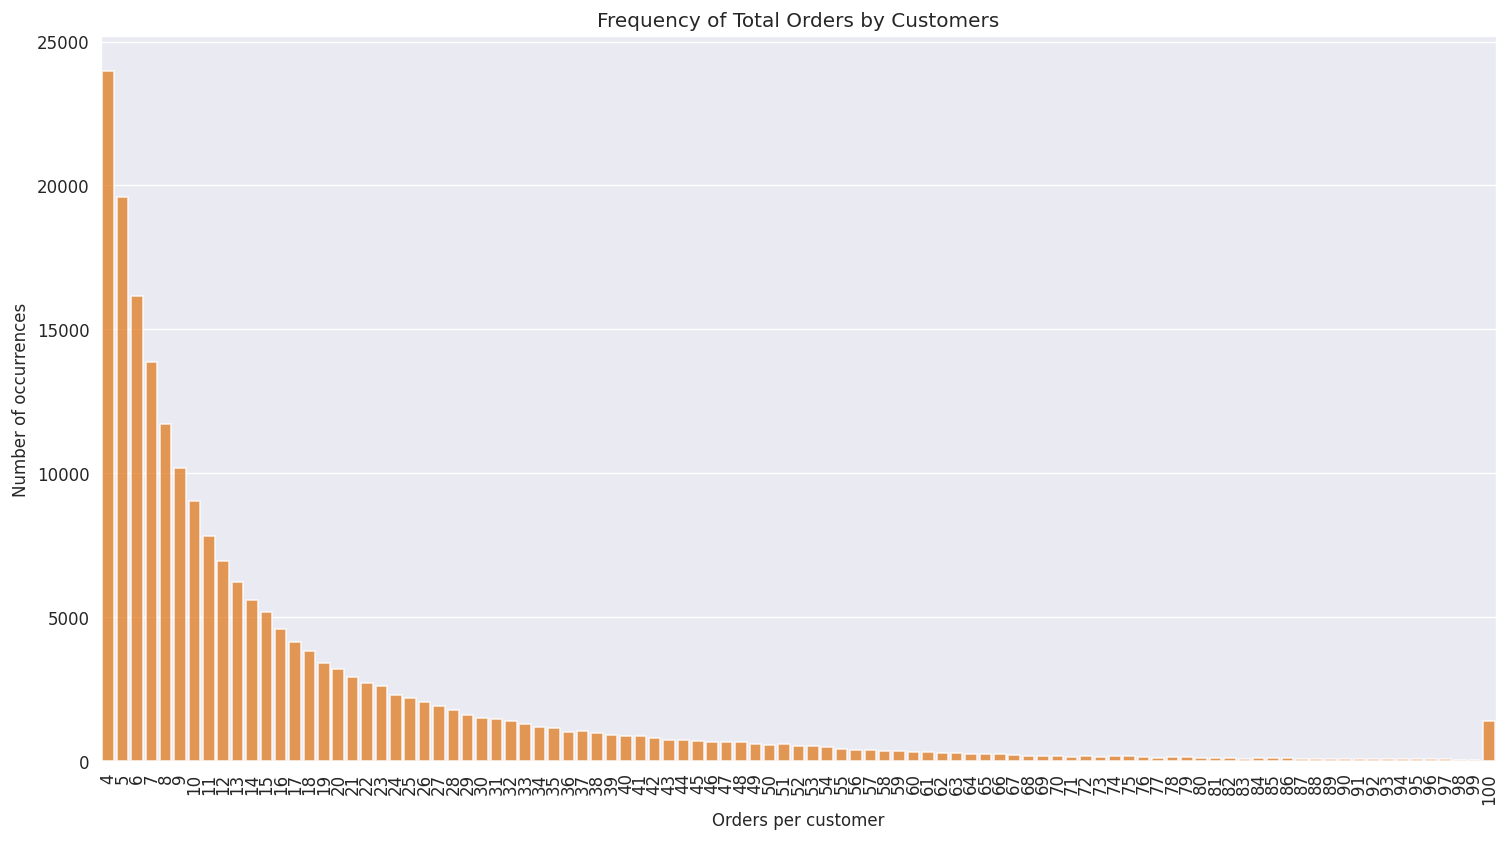

In [43]:
ax=plt.subplots (figsize=(15,8))
ax = sns.barplot(x = max_order_number.index, y = max_order_number.values, alpha=0.8, color = color[1])
ax.set_xlabel('Orders per customer')
ax.set_ylabel('Number of occurrences')
ax.xaxis.set_tick_params(rotation=90, labelsize=10)
ax.set_title('Frequency of Total Orders by Customers')

## **Observation from order file analysis:**

There are total 3421083 orders made by total 206209 users.

There are three sets of orders: Prior, Train and Test. The distributions of orders in Train and Test sets are similar whereas the distribution of orders in Prior set is different.

The total orders per customer ranges from 4 to 100.

Based on the plot of 'Orders VS Day of Week' we can map 0 and 1 as Saturday and Sunday respectively based on the assumption that most of the people buy groceries on weekends.

Majority of the orders are made during the day time.

Customers order once in a week which is supported by peaks at 7, 14, 21 and 30 in 'Orders VS Days since prior order' graph.

Based on the heatmap between 'Day of Week' and 'Hour of Day,' we can say that Saturday afternoons and Sunday mornings are prime time for orders.



## **6.Product**

In [44]:
products_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [45]:
products_df.tail()

,product_id,product_name,aisle_id,department_id
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8
49687,49688,Fresh Foaming Cleanser,73,11


In [46]:
products_df.shape

(49688, 4)

In [47]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [48]:
products_df.describe(include='all')

,product_id,product_name,aisle_id,department_id
count,49688.000000,49688,49688.000000,49688.000000
unique,NaN,49688,NaN,NaN
top,NaN,Chocolate Sandwich Cookies,NaN,NaN
freq,NaN,1,NaN,NaN
mean,24844.500000,NaN,67.769582,11.728687
std,14343.834425,NaN,38.316162,5.850410
min,1.000000,NaN,1.000000,1.000000
25%,12422.750000,NaN,35.000000,7.000000
50%,24844.500000,NaN,69.000000,13.000000
75%,37266.250000,NaN,100.000000,17.000000


# **Data Preparation**

For Analysis, single dataframe is needed, for that I merged the order_product_train and order_product_test as order_product_df dataset.On that I will merge product_id, aisles, deparment and orders file

In [49]:
order_products_df = order_products_prior_df.append(order_products_train_df)
order_products_df.shape

(33819106, 4)

In [50]:
order_products_df = order_products_df.merge(products_df, on ='product_id', how='left')
order_products_df = order_products_df.merge(aisles_df, on ='aisle_id', how='left')
order_products_df = order_products_df.merge(departments_df, on ='department_id', how='left')
order_products_df = order_products_df.merge(orders_df, on='order_id', how='left')
order_products_df.shape

(33819106, 15)

In [51]:
order_products_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279,prior,3,5,9,8.0
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,202279,prior,3,5,9,8.0
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,202279,prior,3,5,9,8.0


In [52]:
order_products_df.tail()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
33819101,3421063,14233,3,1,Natural Artesian Water,115,7,water seltzer sparkling water,beverages,169679,train,30,0,10,4.0
33819102,3421063,35548,4,1,Twice Baked Potatoes,13,20,prepared meals,deli,169679,train,30,0,10,4.0
33819103,3421070,35951,1,1,Organic Unsweetened Almond Milk,91,16,soy lactosefree,dairy eggs,139822,train,15,6,10,8.0
33819104,3421070,16953,2,1,Creamy Peanut Butter,88,13,spreads,pantry,139822,train,15,6,10,8.0
33819105,3421070,4724,3,1,Broccoli Florettes,32,4,packaged produce,produce,139822,train,15,6,10,8.0


In [53]:
order_products_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33819106 entries, 0 to 33819105
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   product_id              int64  
 2   add_to_cart_order       int64  
 3   reordered               int64  
 4   product_name            object 
 5   aisle_id                int64  
 6   department_id           int64  
 7   aisle                   object 
 8   department              object 
 9   user_id                 int64  
 10  eval_set                object 
 11  order_number            int64  
 12  order_dow               int64  
 13  order_hour_of_day       int64  
 14  days_since_prior_order  float64
dtypes: float64(1), int64(10), object(4)
memory usage: 4.0+ GB


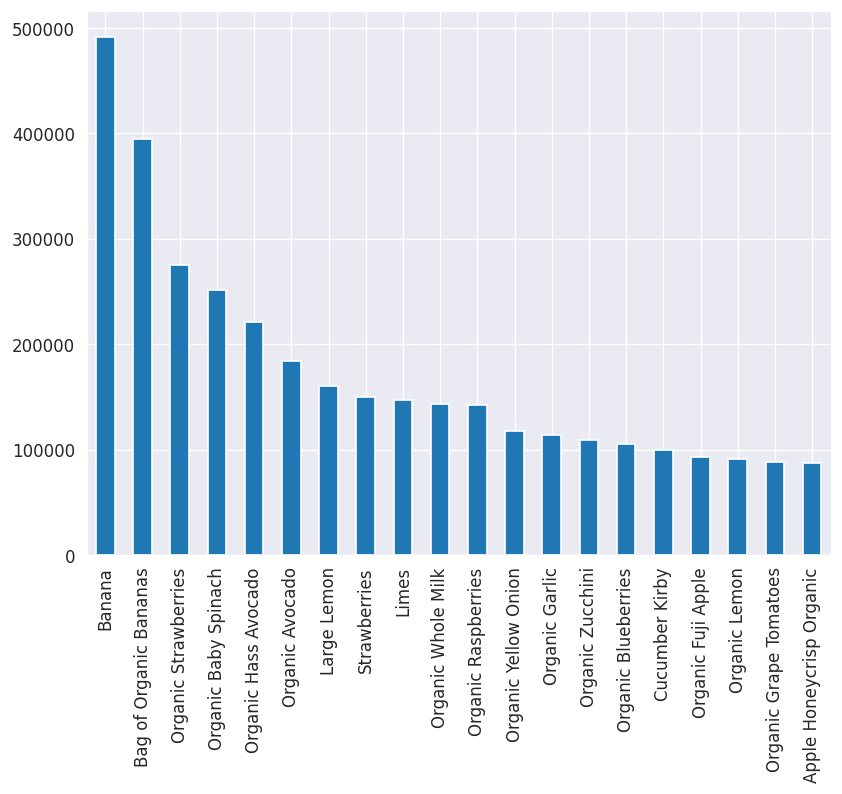

In [55]:
order_products_df.product_name.value_counts().head(20).plot(kind="bar")

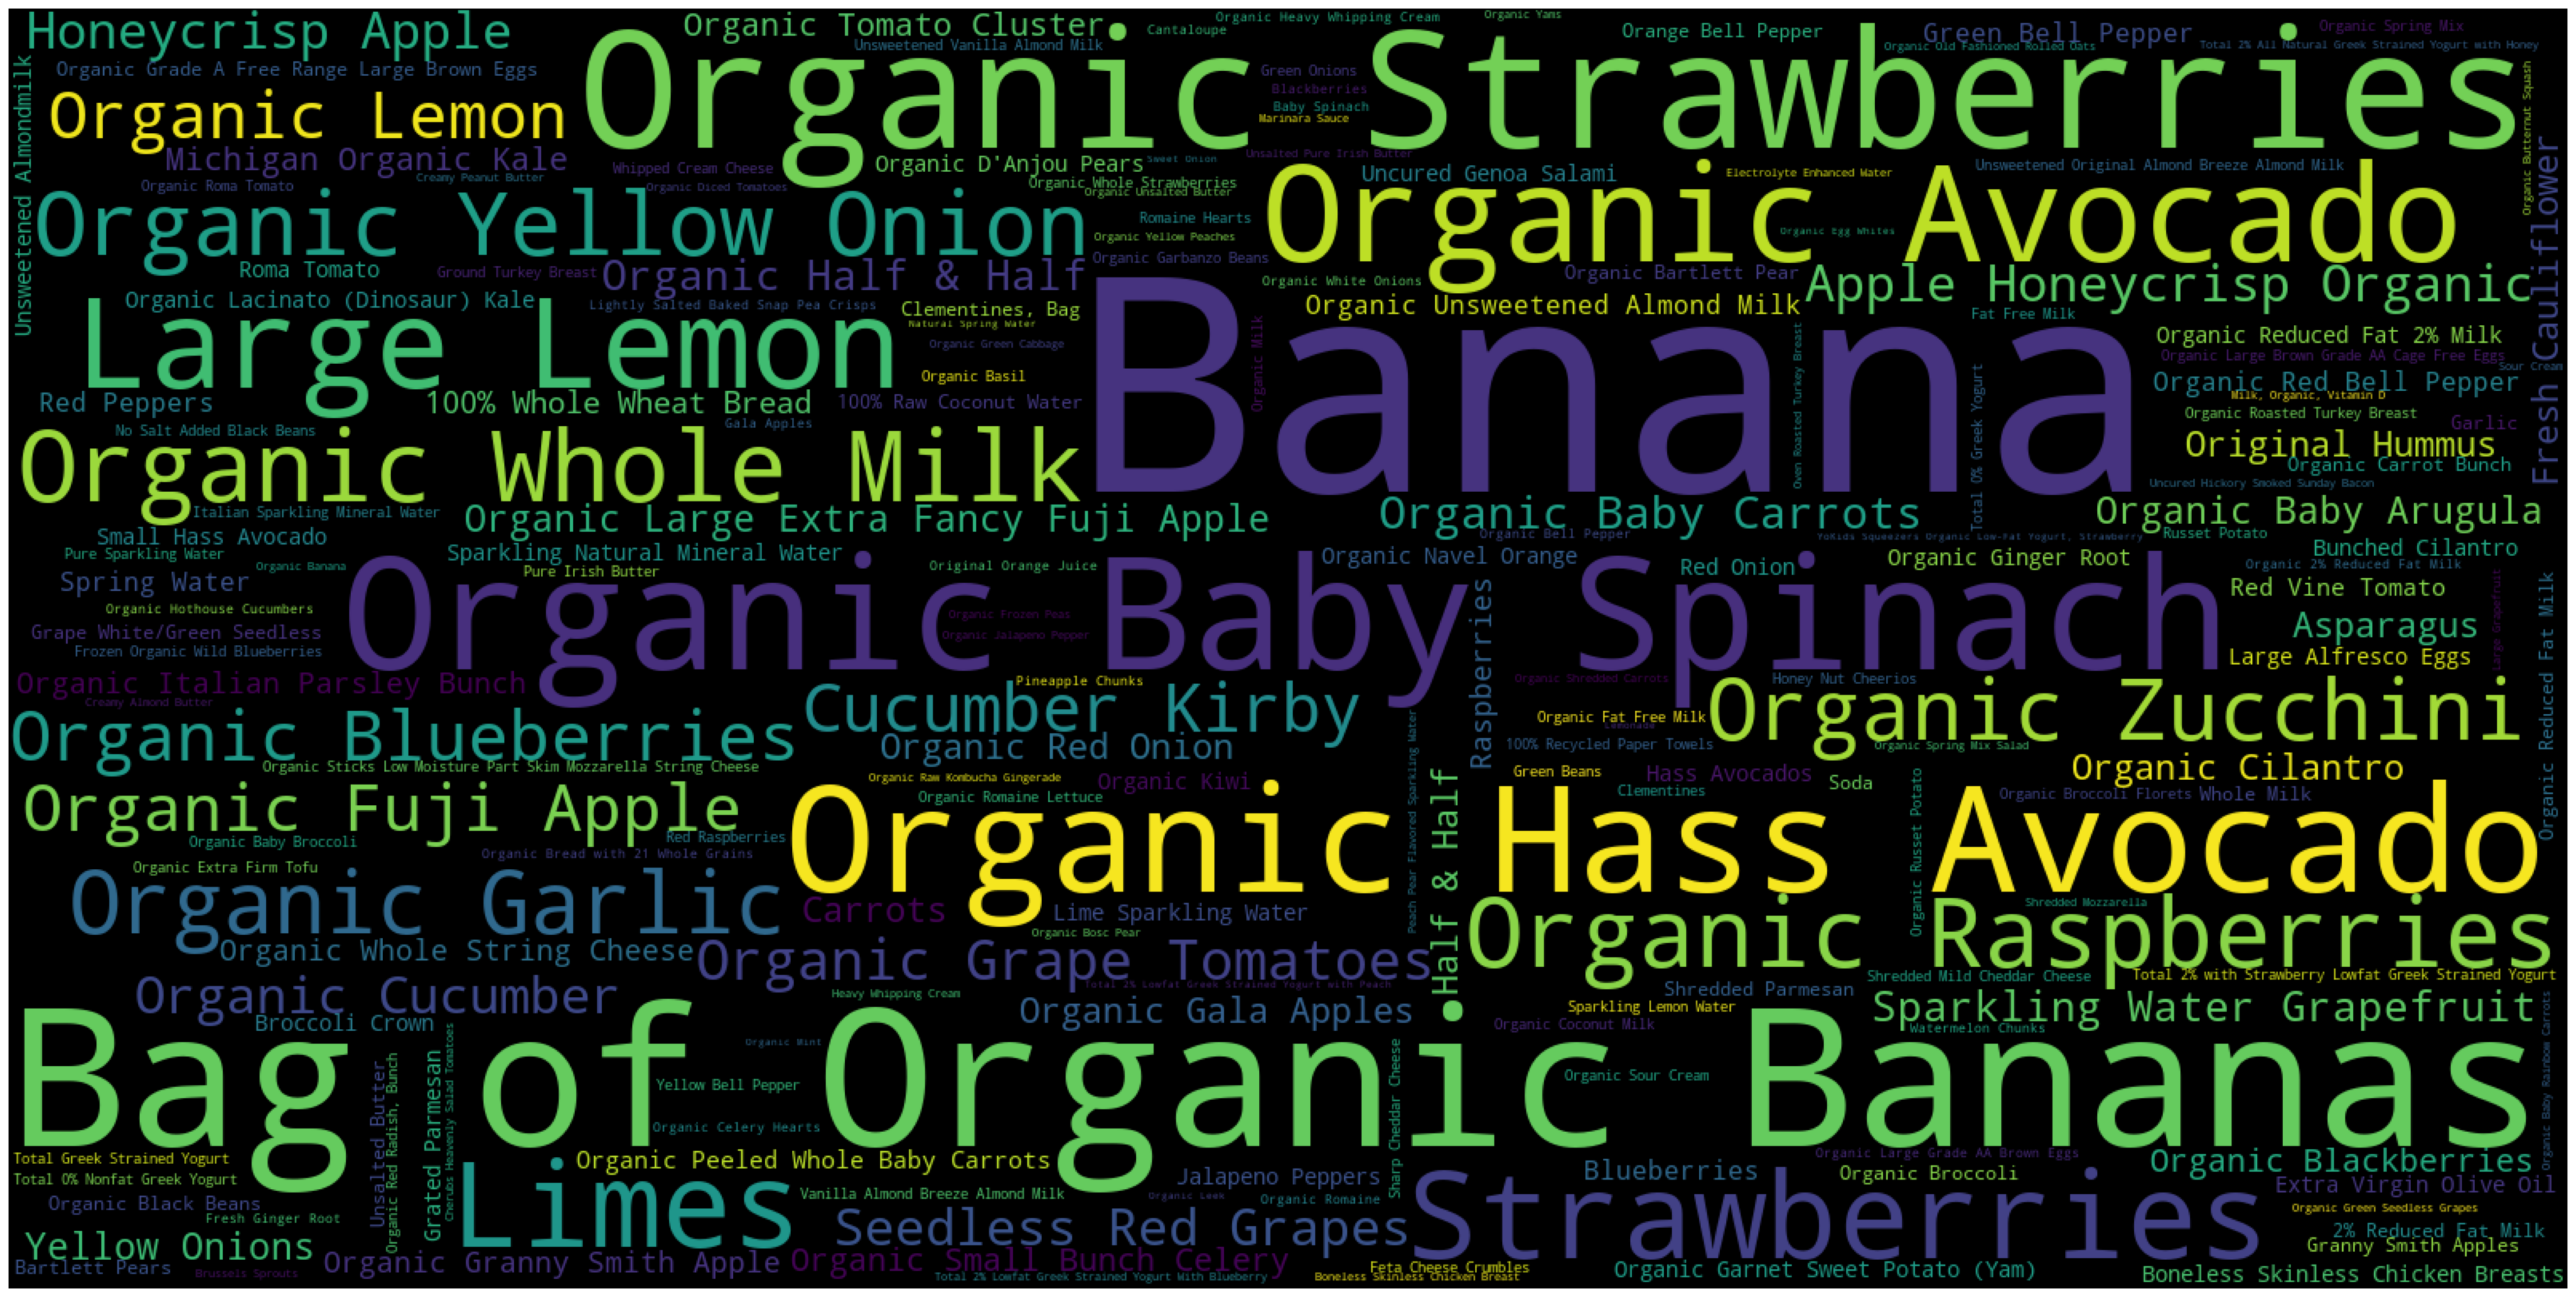

Time taken to run this cell : 0:00:06.157051


In [76]:
# Ploting word cloud
result=order_products_df.product_name.value_counts().to_dict()
start = datetime.now()

# Lets first convert the 'result' dictionary to 'list of tuples'
tup = dict(result.items())
#Initializing WordCloud using frequencies of tags.
wordcloud = WordCloud(    background_color='black',
                          width=1600,
                          height=800,
                    ).generate_from_frequencies(tup)
fig = plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
print("Time taken to run this cell :", datetime.now() - start)

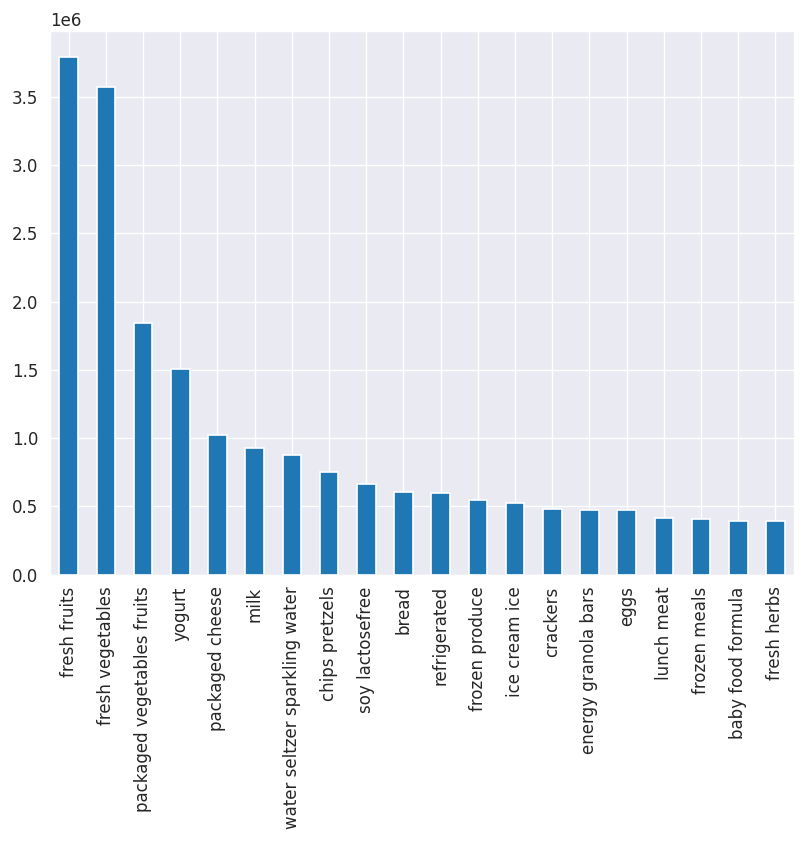

In [61]:
order_products_df.aisle.value_counts().head(20).plot(kind="bar")

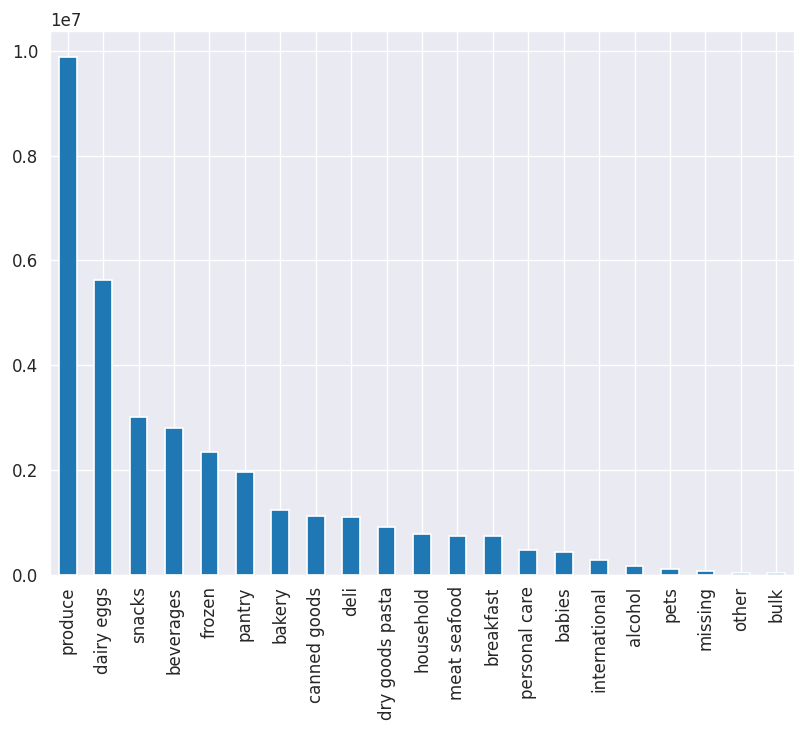

In [59]:
order_products_df.department.value_counts().plot(kind="bar")

Text(0.5, 1.0, 'Reordered ratio vs department')

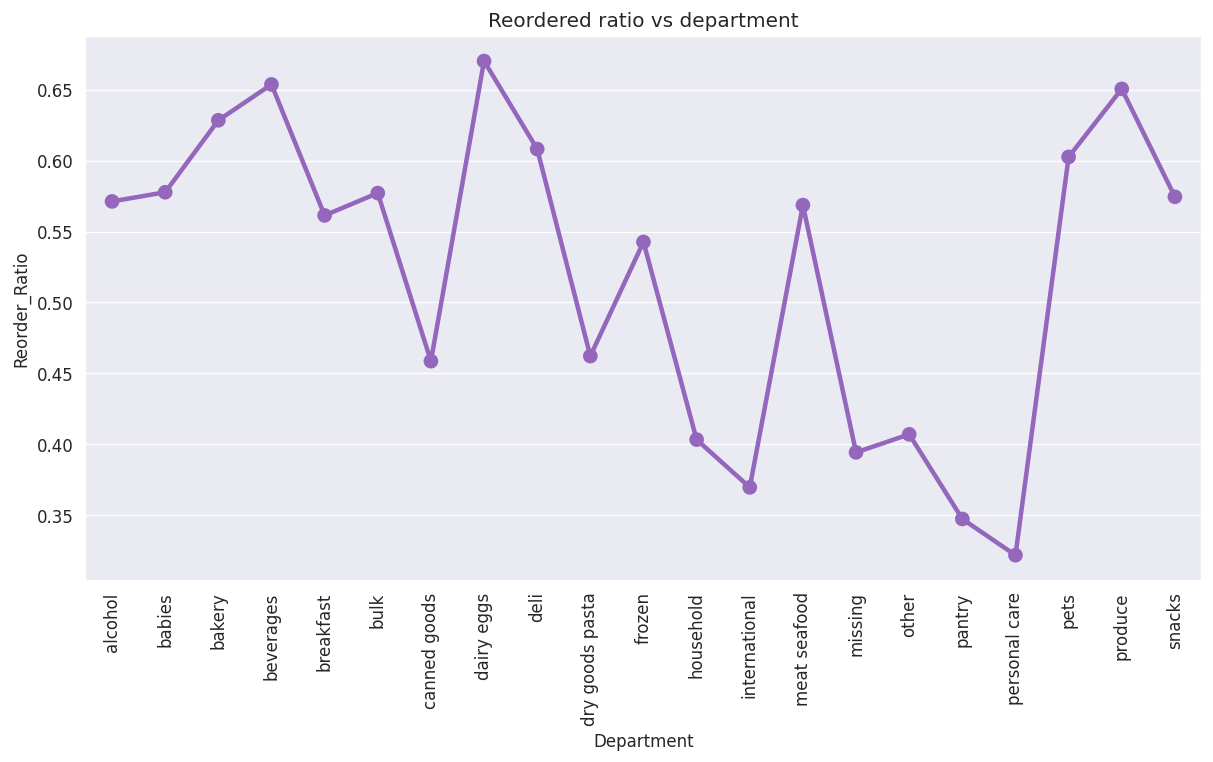

In [67]:
# Reordered ratio vs department
df = order_products_df.groupby(['department'], as_index= False)['reordered'].mean()

ax=plt.subplots (figsize=(12,6))
ax = sns.pointplot(x = df['department'].values, y = df['reordered'].values, alpha=0.8, color = color[4])
ax.set_xlabel('Department')
ax.set_ylabel('Reorder_Ratio')
ax.xaxis.set_tick_params(rotation=90, labelsize=10)
ax.set_title('Reordered ratio vs department')

Dairy Eggs has the highest reorder ratio i.e if the person is reordering 10 times then out of that 7 times he reorders dairy eggs whereas personal care has the lowest reorder ratio.

Text(0.5, 1.0, 'Reordered ratio vs Add to cart order')

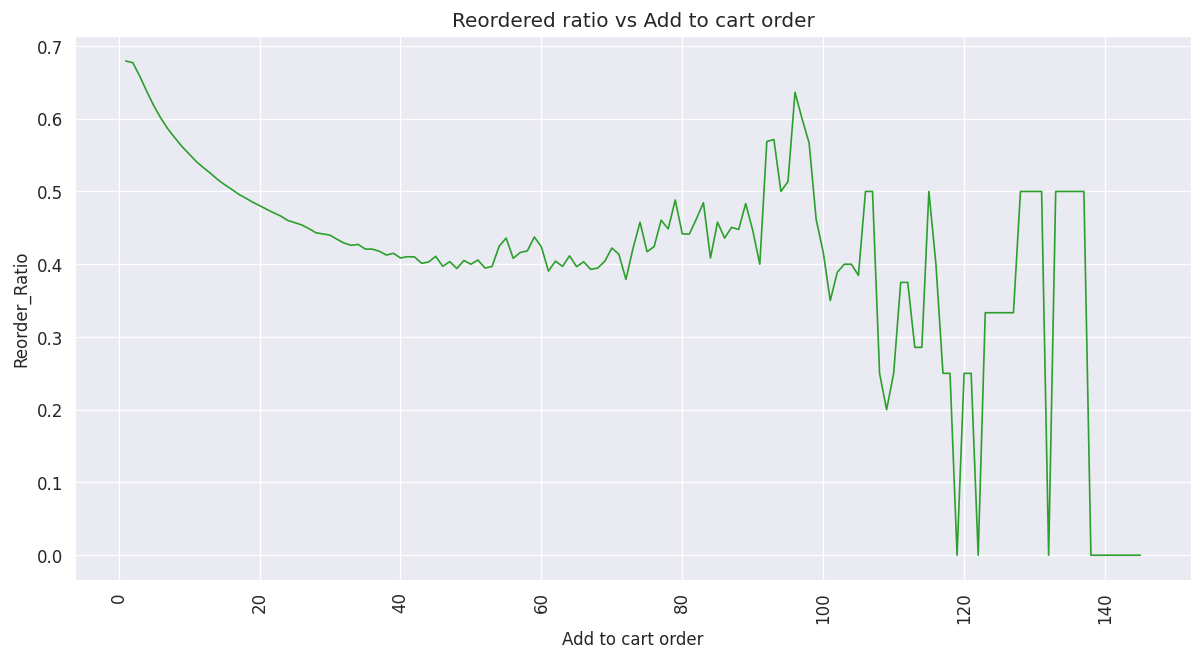

In [72]:
# Reordered ratio vs Add to cart order
df_ado = order_products_df.groupby(['add_to_cart_order'], as_index= False)['reordered'].mean()

ax=plt.subplots (figsize=(12,6))
ax = sns.lineplot(x = df_ado['add_to_cart_order'].values, y = df_ado['reordered'].values, lw = 1, color = color[2])
ax.set_xlabel('Add to cart order',fontsize=10)
ax.set_ylabel('Reorder_Ratio',fontsize=10)
ax.xaxis.set_tick_params(rotation=90, labelsize=10)
ax.set_title('Reordered ratio vs Add to cart order')

The products which are added to the cart intially are more likely to get reordered agains in comparison to the products added later. This makes sense as we add the item to cart first which we buy frequently.